28.104343567468884
3065.5759595725485
35.8140764322394
3345.667735609613
21.508025593598152
3046.3977139539284


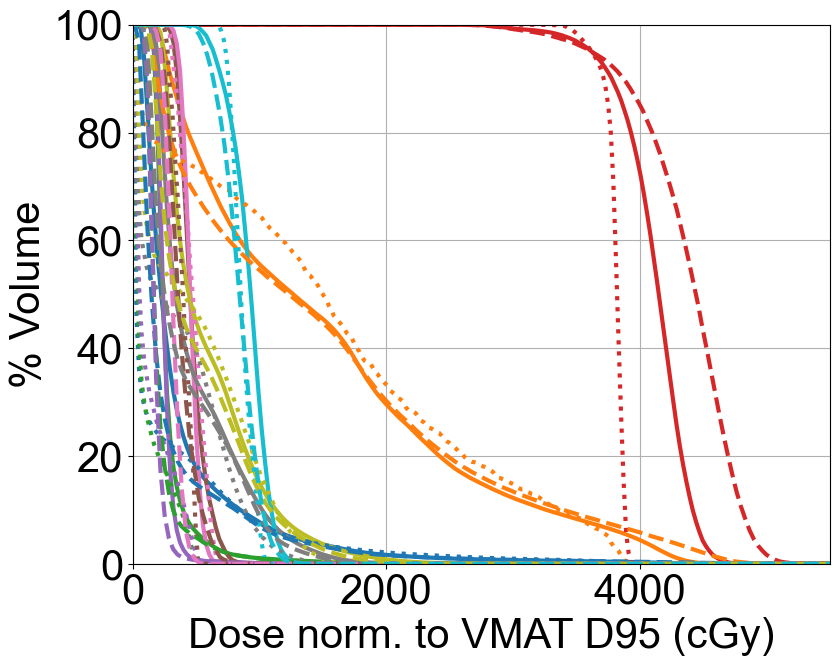

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy as sp
from scipy.interpolate import interp1d

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)


#VHEE open beam DVH
dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_allangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm=f(95)
print(dosenorm)
figure(1,figsize=(9,7))
plt.plot(5,5,lw=3,label='250 MeV GRID',c='black')
plt.plot(5,5,lw=3,ls='--',label='150 MeV GRID',c='black')
plt.plot(5,5,lw=3,ls=':',label='6 MV VMAT',c='black')
plt.plot(dvhsfrt.BRAIN_Dose/dosenorm*3620,dvhsfrt.BRAIN_Value,label='BRAIN',lw=3)
plt.plot(dvhsfrt.BRAINSTEM_Dose/dosenorm*3620,dvhsfrt.BRAINSTEM_Value,label='BRAINSTEM',lw=3)
plt.plot(dvhsfrt.GLOBE_L_Dose/dosenorm*3620,dvhsfrt.GLOBE_L_Value,label='GLOBE L',lw=3)
plt.plot(dvhsfrt.PTV_ov_Dose/dosenorm*3620,dvhsfrt.PTV_ov_Value,label='PTV',lw=3)
plt.plot(dvhsfrt.GLOBE_R_Dose/dosenorm*3620,dvhsfrt.GLOBE_R_Value,label='GLOBE R',lw=3)
plt.plot(dvhsfrt.COCHLEA_R_Dose/dosenorm*3620,dvhsfrt.COCHLEA_R_Value,label='COCHLEA R',lw=3)
plt.plot(dvhsfrt.COCHLEA_L_Dose/dosenorm*3620,dvhsfrt.COCHLEA_L_Value,label='COCHLEA L',lw=3)
plt.plot(dvhsfrt.TEMP_LOBE_R_Dose/dosenorm*3620,dvhsfrt.TEMP_LOBE_R_Value,label='TEMP LOBE R',lw=3)
plt.plot(dvhsfrt.TEMP_LOBE_L_Dose/dosenorm*3620,dvhsfrt.TEMP_LOBE_L_Value,label='TEMP LOBE L',lw=3)
plt.plot(dvhsfrt.CHIASM_Dose/dosenorm*3620,dvhsfrt.CHIASM_Value,label='CHIASM',lw=3)
plt.grid()
#plt.legend(bbox_to_anchor=(1.50,0.5), loc="center right")
plt.xlim(left=0)
plt.ylim(0,100)
plt.xlabel('Dose norm. to VMAT D95 (cGy)')
plt.ylabel('% Volume')
#plt.title('250 MeV SFRT (solid) vs 100 MeV best (dashed) vs RT-plan (dotted)')

brain_int_250=np.trapz(dvhsfrt.BRAIN_Value,dvhsfrt.BRAIN_Dose/dosenorm*3620)
brainstem_int_250=np.trapz(dvhsfrt.BRAINSTEM_Value,dvhsfrt.BRAINSTEM_Dose/dosenorm*3620)
ptv_int_250=np.trapz(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose/dosenorm*3620)

underdose_mean=[]
for i in np.arange(0,len(dvhsfrt.PTV_ov_Value)):
    if (dvhsfrt.PTV_ov_Dose[i]/dosenorm*3620<=3620) and (dvhsfrt.PTV_ov_Value[i]<100):
        underdose_mean.append(dvhsfrt.PTV_ov_Dose[i]/dosenorm*3620)
print(np.mean(underdose_mean))

dvh=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/RTplanDVH.csv",delimiter= ',',comment='#')
f1=interp1d(dvh.PTV_ov_Value,dvh.PTV_ov_Dose)
dosenorm2=f1(95)
print(dosenorm2)
plt.plot(dvh.BRAIN_Dose/dosenorm2*3620,dvh.BRAIN_Value,label='BRAIN',ls=':',lw=3)
plt.plot(dvh.BRAINSTEM_Dose/dosenorm2*3620,dvh.BRAINSTEM_Value,label='BRAINSTEM',ls=':',lw=3)
plt.plot(dvh.GLOBE_L_Dose/dosenorm2*3620,dvh.GLOBE_L_Value,label='GLOBE_L',ls=':',lw=3)
plt.plot(dvh.PTV_ov_Dose/dosenorm2*3620,dvh.PTV_ov_Value,label='PTV-ov',ls=':',lw=3)
plt.plot(dvh.GLOBE_R_Dose/dosenorm2*3620,dvh.GLOBE_R_Value,label='GLOBE_R',ls=':',lw=3)
plt.plot(dvh.COCHLEA_R_Dose/dosenorm2*3620,dvh.COCHLEA_R_Value,label='COCHLEA_R',ls=':',lw=3)
plt.plot(dvh.COCHLEA_L_Dose/dosenorm2*3620,dvh.COCHLEA_L_Value,label='COCHLEA_L',ls=':',lw=3)
plt.plot(dvh.TEMP_LOBE_R_Dose/dosenorm2*3620,dvh.TEMP_LOBE_R_Value,label='TEMP_LOBE_R',ls=':',lw=3)
plt.plot(dvh.TEMP_LOBE_L_Dose/dosenorm2*3620,dvh.TEMP_LOBE_L_Value,label='TEMP_LOBE_L',ls=':',lw=3)
plt.plot(dvh.CHIASM_Dose/dosenorm2*3620,dvh.CHIASM_Value,label='CHIASM',ls=':',lw=3)

brain_int_vmat=np.trapz(dvh.BRAIN_Value,dvh.BRAIN_Dose/dosenorm2*3620)
brainstem_int_vmat=np.trapz(dvh.BRAINSTEM_Value,dvh.BRAINSTEM_Dose/dosenorm2*3620)
ptv_int_vmat=np.trapz(dvh.PTV_ov_Value,dvh.PTV_ov_Dose/dosenorm2*3620)

underdose_mean=[]
for i in np.arange(0,len(dvh.PTV_ov_Value)):
    if (dvh.PTV_ov_Dose[i]/dosenorm2*3620<=3620) and (dvh.PTV_ov_Value[i]<100):
        underdose_mean.append(dvh.PTV_ov_Dose[i]/dosenorm2*3620)
print(np.mean(underdose_mean))               
                   
dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_150MVallangles5M.csv",delimiter= ',',comment='#')
f2=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm=f2(95)
print(dosenorm)
figure(1,figsize=(8,8))
plt.plot(dvhsfrt.BRAIN_Dose/dosenorm*3620,dvhsfrt.BRAIN_Value,label='BRAIN',ls='--',lw=3)
plt.plot(dvhsfrt.BRAINSTEM_Dose/dosenorm*3620,dvhsfrt.BRAINSTEM_Value,label='BRAINSTEM',ls='--',lw=3)
plt.plot(dvhsfrt.GLOBE_L_Dose/dosenorm*3620,dvhsfrt.GLOBE_L_Value,label='GLOBE_L',ls='--',lw=3)
plt.plot(dvhsfrt.PTV_ov_Dose/dosenorm*3620,dvhsfrt.PTV_ov_Value,label='PTV-ov',ls='--',lw=3)
plt.plot(dvhsfrt.GLOBE_R_Dose/dosenorm*3620,dvhsfrt.GLOBE_R_Value,label='GLOBE_R',ls='--',lw=3)
plt.plot(dvhsfrt.COCHLEA_R_Dose/dosenorm*3620,dvhsfrt.COCHLEA_R_Value,label='COCHLEA_R',ls='--',lw=3)
plt.plot(dvhsfrt.COCHLEA_L_Dose/dosenorm*3620,dvhsfrt.COCHLEA_L_Value,label='COCHLEA_L',ls='--',lw=3)
plt.plot(dvhsfrt.TEMP_LOBE_R_Dose/dosenorm*3620,dvhsfrt.TEMP_LOBE_R_Value,label='TEMP_LOBE_R',ls='--',lw=3)
plt.plot(dvhsfrt.TEMP_LOBE_L_Dose/dosenorm*3620,dvhsfrt.TEMP_LOBE_L_Value,label='TEMP_LOBE_L',ls='--',lw=3)
plt.plot(dvhsfrt.CHIASM_Dose/dosenorm*3620,dvhsfrt.CHIASM_Value,label='CHIASM',ls='--',lw=3)
#plt.title('SFRT 150 MeV (solid) vs SFRT 250 MeV (dashed) vs RT-plan (dotted)')
plt.xlim((0,5500))

brain_int_150=np.trapz(dvhsfrt.BRAIN_Value,dvhsfrt.BRAIN_Dose/dosenorm*3620)
brainstem_int_150=np.trapz(dvhsfrt.BRAINSTEM_Value,dvhsfrt.BRAINSTEM_Dose/dosenorm*3620)
ptv_int_150=np.trapz(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose/dosenorm*3620)

underdose_mean=[]
for i in np.arange(0,len(dvhsfrt.PTV_ov_Value)):
    if (dvhsfrt.PTV_ov_Dose[i]/dosenorm*3620<=3620) and (dvhsfrt.PTV_ov_Value[i]<100):
        underdose_mean.append(dvhsfrt.PTV_ov_Dose[i]/dosenorm*3620)
print(np.mean(underdose_mean))
#plt.title('Mini-GRID')

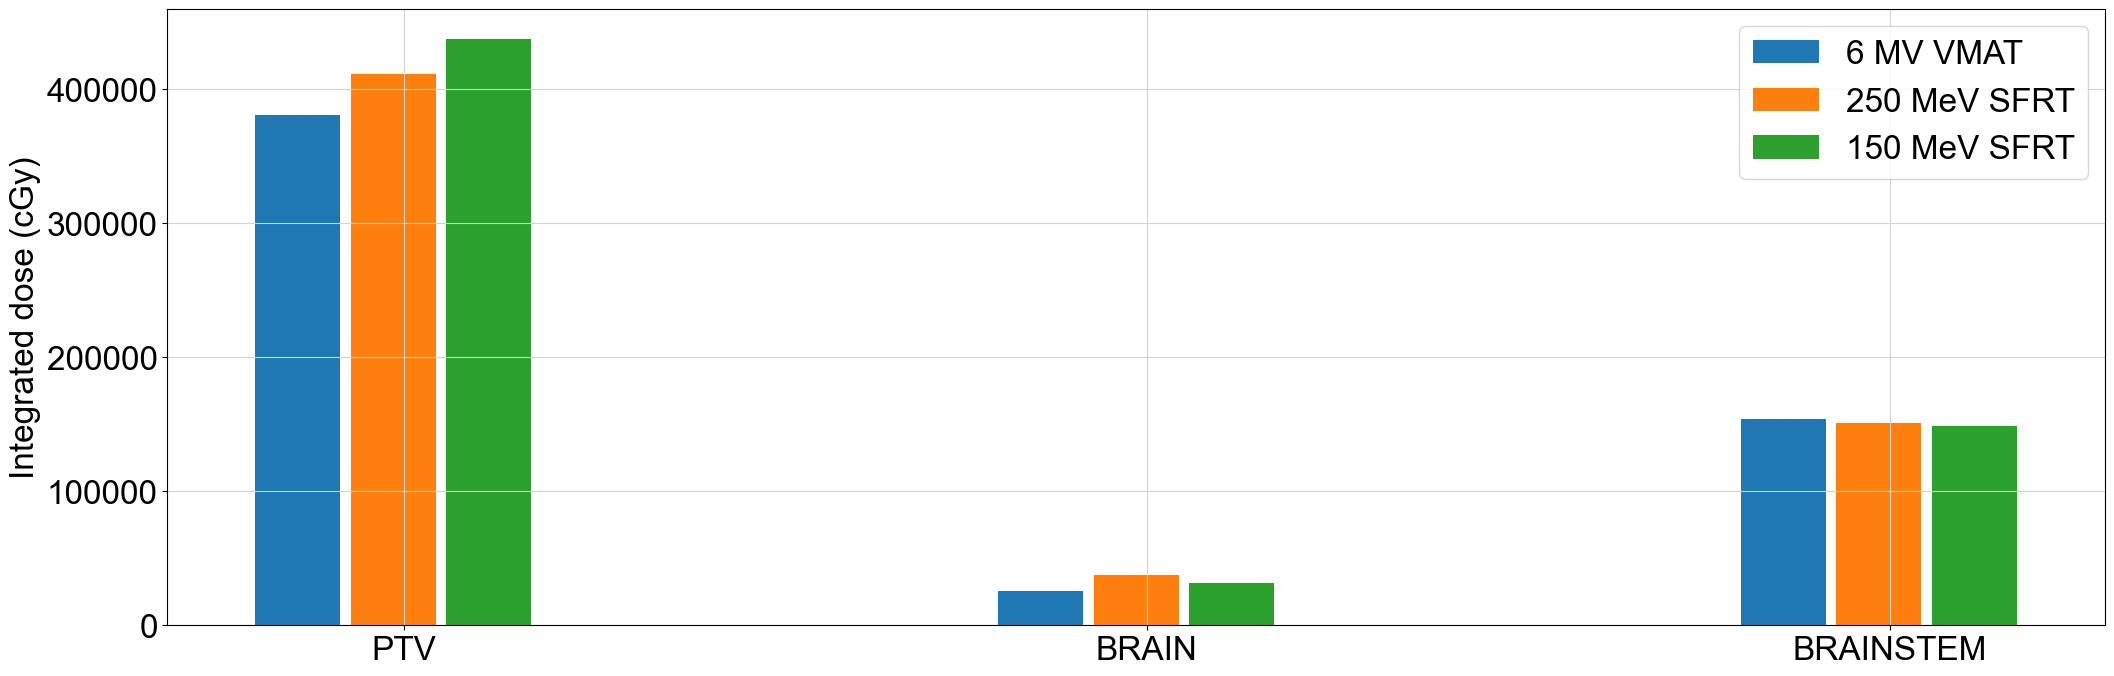

In [2]:
#Integrate DVHs
struct=['PTV','BRAIN','BRAINSTEM']
X_axis = np.arange(len(struct))*7

sfrt250_int=np.array([ptv_int_250,brain_int_250,brainstem_int_250])
sfrt150_int=np.array([ptv_int_150,brain_int_150,brainstem_int_150])
vmat_int=np.array([ptv_int_vmat,brain_int_vmat,brainstem_int_vmat])

figure(1,figsize=(25,8))
plt.xticks(X_axis-0.8,struct)
plt.bar(X_axis-1.8,vmat_int,label='6 MV VMAT')
plt.bar(X_axis-0.9,sfrt250_int,label='250 MeV SFRT')
plt.bar(X_axis,sfrt150_int,label='150 MeV SFRT')
plt.grid(c='lightgray')
plt.ylabel('Integrated dose (cGy)')
plt.legend()


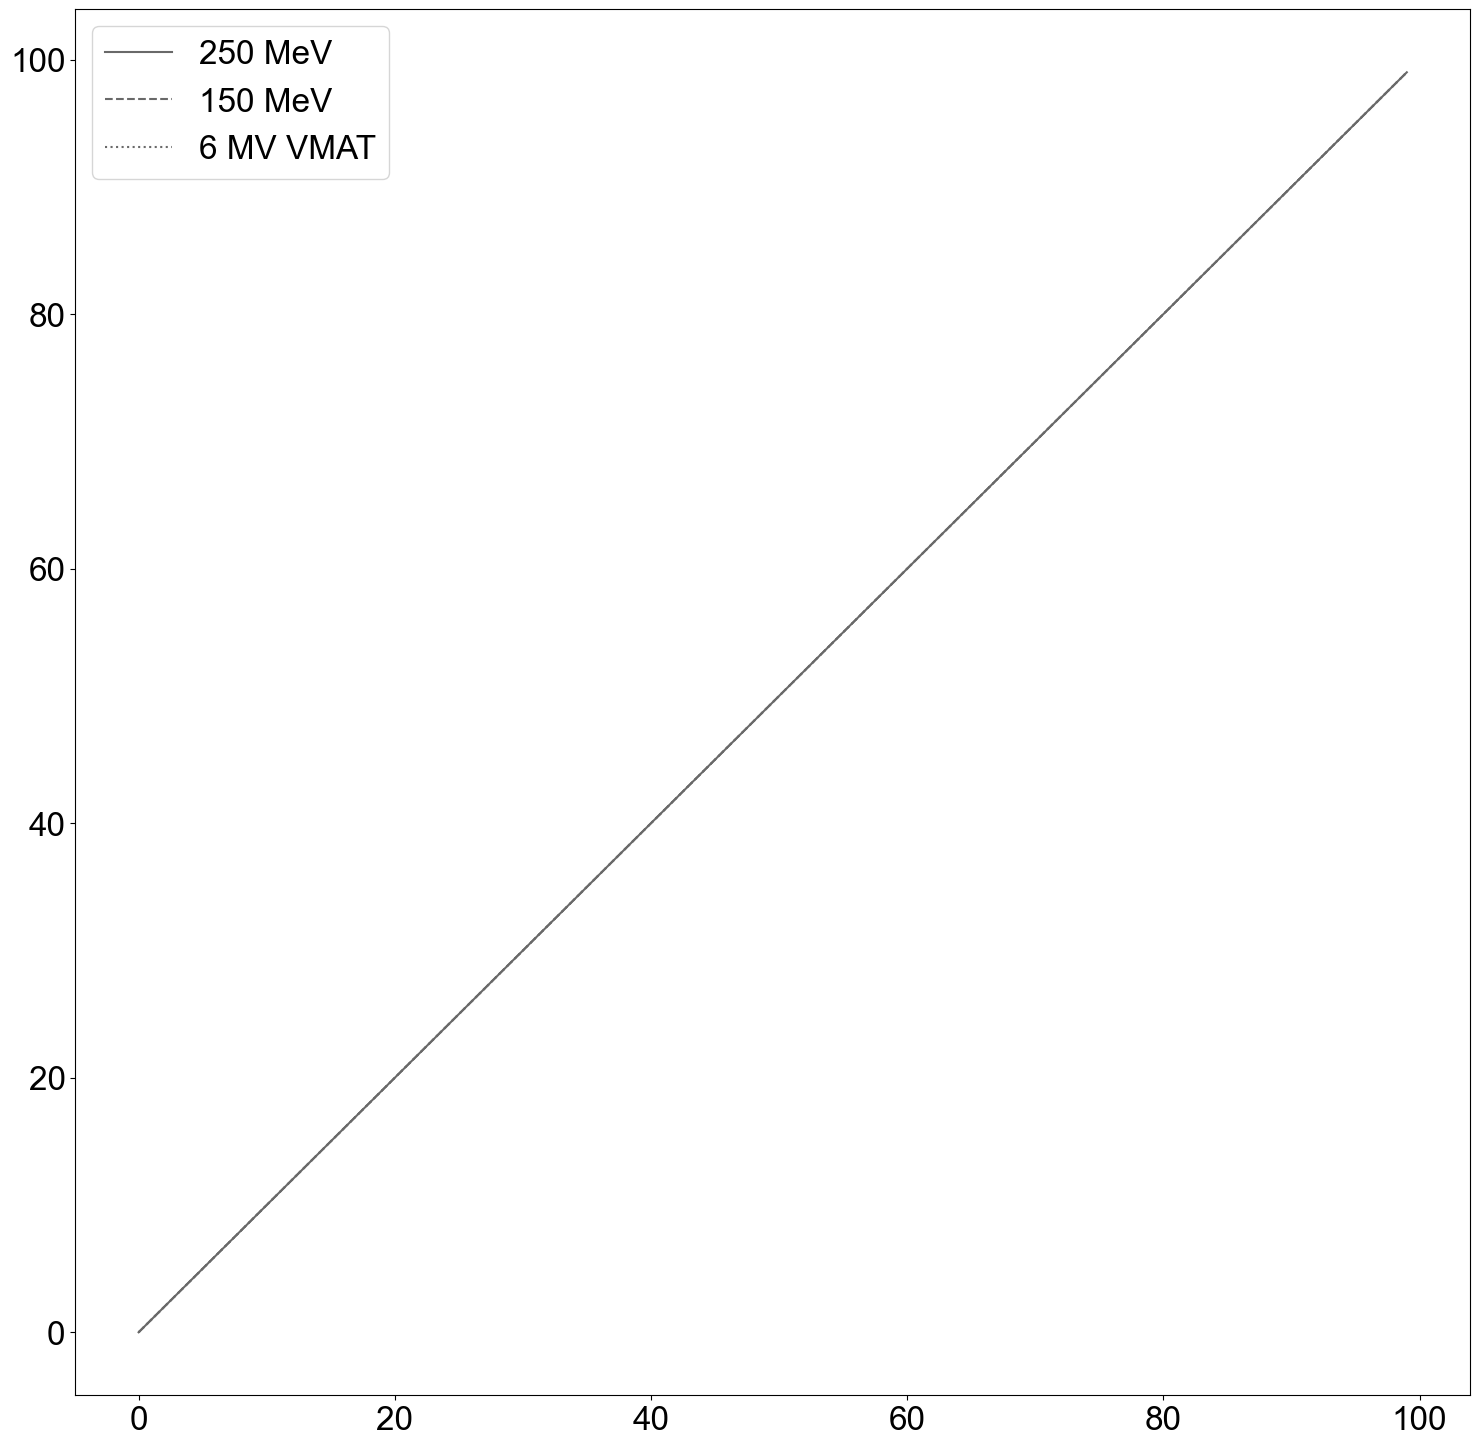

In [3]:
figure(1,figsize=(18,18))
plt.plot(np.arange(0,100),np.arange(0,100),label='250 MeV',c='dimgrey')
plt.plot(np.arange(0,100),np.arange(0,100),ls='--',label='150 MeV',c='dimgrey')
plt.plot(np.arange(0,100),np.arange(0,100), ls=':',label='6 MV VMAT',c='dimgrey')
plt.legend()

28.104343567468884
28.104343567468884


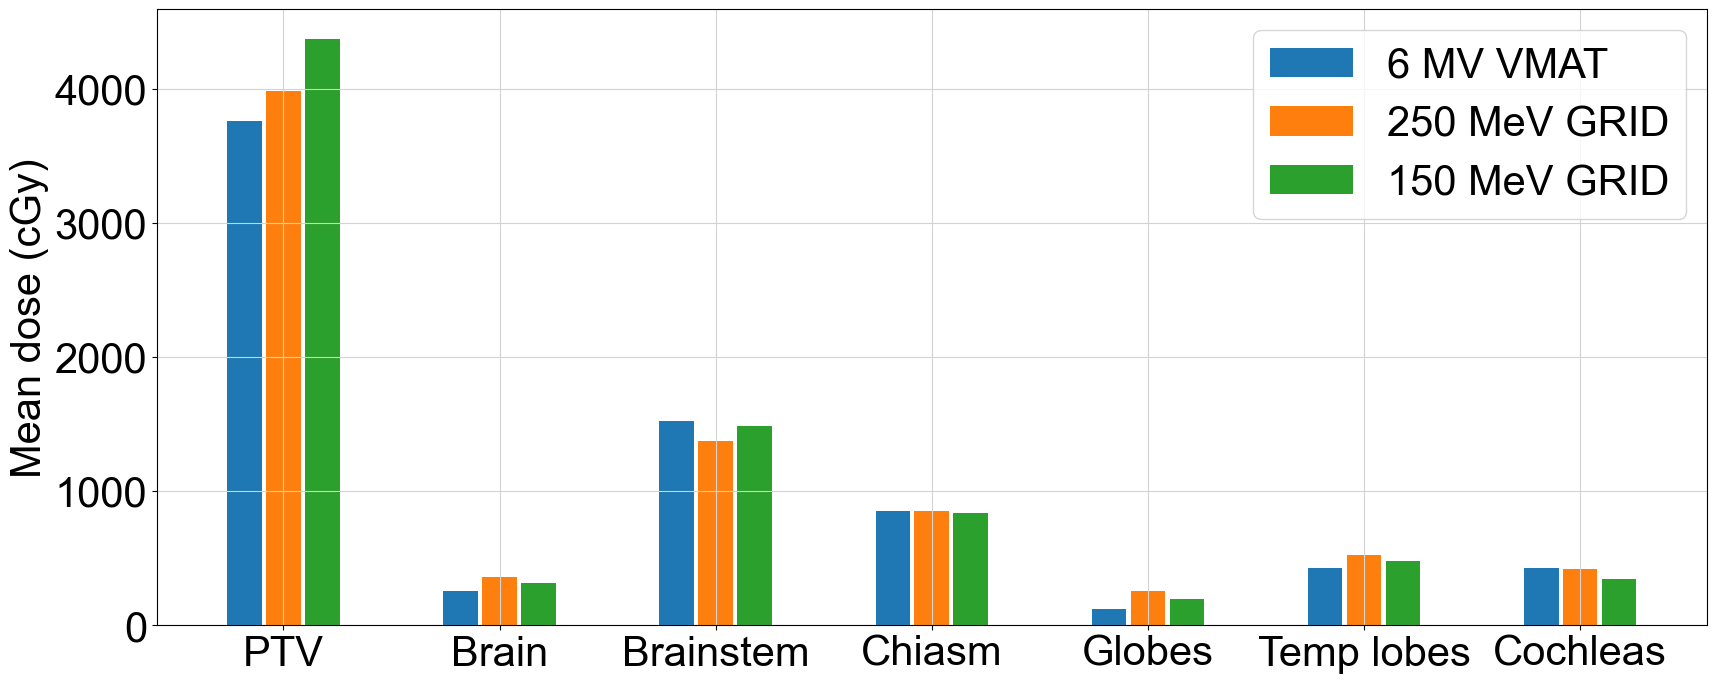

In [91]:
#VHEE SFRT 250 MeV Mean doses for structures

brain_avg=2.787;ptvov_avg=30.9106;brainstem_avg=10.652;chiasm_avg=6.60195;
globe_l_avg=2.11089;globe_r_avg=1.90288;temp_lobe_r_avg=3.63302;cochlea_l_avg=3.38205;
temp_lobe_l_avg=4.52387; cochlea_r_avg=3.16853;
globe_avg=np.mean([globe_l_avg,globe_r_avg]);cochlea_avg=np.mean([cochlea_l_avg,cochlea_r_avg]);temp_lobe_avg=np.mean([temp_lobe_l_avg,temp_lobe_r_avg])
means_sfrt=[ptvov_avg,brain_avg,brainstem_avg,chiasm_avg,globe_avg,temp_lobe_avg,cochlea_avg]
struct=['PTV','Brain','Brainstem','Chiasm','Globes','Temp lobes','Cochleas']

X_axis = np.arange(len(struct))*5


dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_allangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm=f(95)
print(dosenorm)


dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_150MVallangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm4=f(95)
print(dosenorm)
sfrt150=[25.9945,1.8536,8.82606,4.97548,1.153,2.834,2.069]


figure(1,figsize=(20,8))
plt.xticks(X_axis-0.9,struct)
# RT-plan mean doses
means_rt=[37.6286,2.52047,15.2476,8.52494,1.223,4.289,4.2929]
plt.bar(X_axis-1.8,np.array(means_rt)*100,label='6 MV VMAT')
plt.bar(X_axis-0.9,means_sfrt/dosenorm*3620,label='250 MeV GRID')
plt.bar(X_axis,sfrt150/dosenorm4*3620,label='150 MeV GRID')
#plt.barh(X_axis+0.9,openbeam150/dosenorm3*3620,label='150 MeV open beam')
#plt.barh(X_axis+1.8,openbeam250/dosenorm2*3620,label='250 MeV open beam')
plt.grid(c='lightgray')
plt.ylabel('Mean dose (cGy)')
plt.legend()

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

28.104343567468884
28.104343567468884
28.104343567468884
28.104343567468884


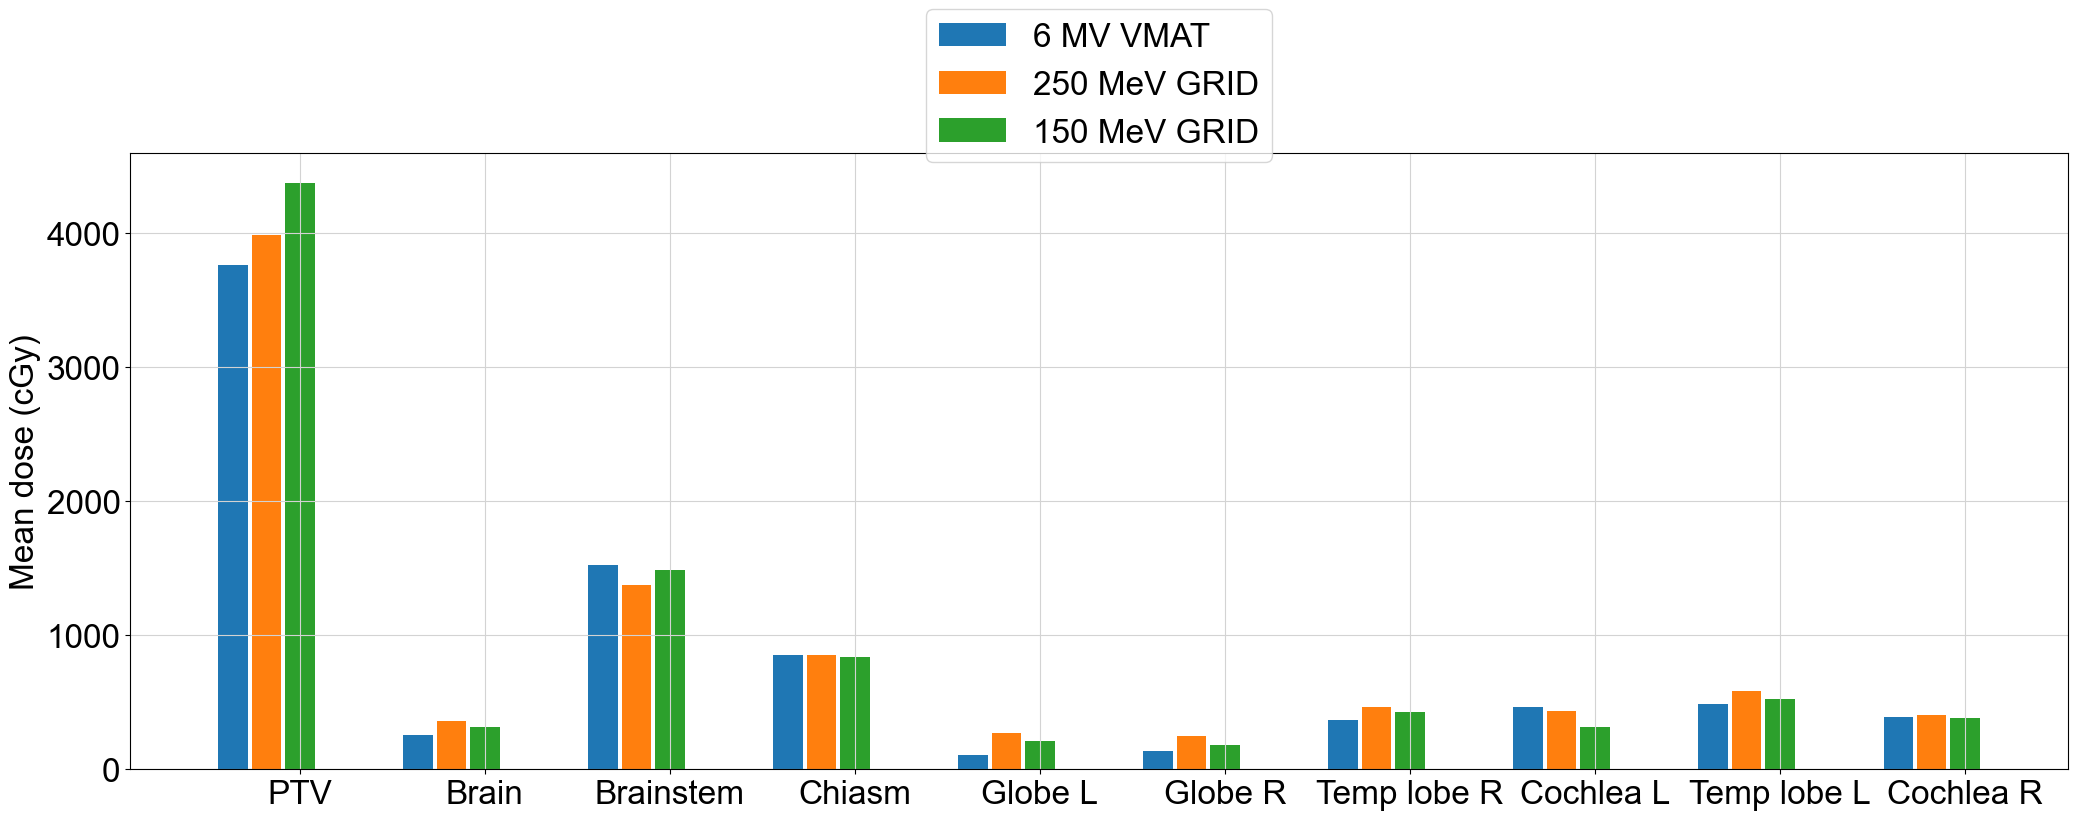

In [76]:
#VHEE SFRT 250 MeV Mean doses for structures

brain_avg=2.787;ptvov_avg=30.9106;brainstem_avg=10.652;chiasm_avg=6.60195;
globe_l_avg=2.11089;globe_r_avg=1.90288;temp_lobe_r_avg=3.63302;cochlea_l_avg=3.38205;
temp_lobe_l_avg=4.52387; cochlea_r_avg=3.16853;
means_sfrt=[ptvov_avg,brain_avg,brainstem_avg,chiasm_avg,globe_l_avg,globe_r_avg,temp_lobe_r_avg,cochlea_l_avg,temp_lobe_l_avg,cochlea_r_avg]
struct=['PTV','Brain','Brainstem','Chiasm','Globe L','Globe R','Temp lobe R','Cochlea L','Temp lobe L', 'Cochlea R']

X_axis = np.arange(len(struct))*5


dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_allangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm=f(95)
print(dosenorm)
dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_openbeamallangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm2=f(95)
print(dosenorm)
openbeam250=[270.427,14.572,83.7028,45.5799,8.2595,6.3163,20.9938,11.5108,26.3435,15.9843]

dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_150MVopenbeamallangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm3=f(95)
print(dosenorm)
openbeam150=[245.648,11.9766,75.5612,39.2734,6.41231,4.41093,17.8356,8.27669,22.252,13.7824]

dvhsfrt=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_150MVallangles5M.csv",delimiter= ',',comment='#')
f=interp1d(dvhsfrt.PTV_ov_Value,dvhsfrt.PTV_ov_Dose)
dosenorm4=f(95)
print(dosenorm)
sfrt150=[25.9945,1.8536,8.82606,4.97548,1.2493,1.05757,2.54356,1.8825,3.12523,2.25801]



figure(1,figsize=(25,8))
plt.xticks(X_axis,struct)
# RT-plan mean doses
means_rt=[37.6286,2.52047,15.2476,8.52494,1.1003,1.34605,3.67333,4.66783,4.9049,3.90836]
plt.bar(X_axis-1.8,np.array(means_rt)*100,label='6 MV VMAT')
plt.bar(X_axis-0.9,means_sfrt/dosenorm*3620,label='250 MeV GRID')
plt.bar(X_axis,sfrt150/dosenorm4*3620,label='150 MeV GRID')
#plt.barh(X_axis+0.9,openbeam150/dosenorm3*3620,label='150 MeV open beam')
#plt.barh(X_axis+1.8,openbeam250/dosenorm2*3620,label='250 MeV open beam')
plt.grid(c='lightgray')
plt.ylabel('Mean dose (cGy)')
plt.legend(bbox_to_anchor=(0.5,1.11), loc="center")

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)

In [5]:
print((sfrt150[4]/dosenorm4*3620)/(np.array(means_rt)*100)[4])
print((means_sfrt[4]/dosenorm*3620)/(np.array(means_rt)*100)[4])
print((openbeam150[4]/dosenorm3*3620)/(np.array(means_rt)*100)[4])
print((openbeam250[4]/dosenorm2*3620)/(np.array(means_rt)*100)[4])
print(np.mean(openbeam250[1:-1]/dosenorm2*3620/means_rt[1:-1]))
print(np.mean(openbeam150[1:-1]/dosenorm3*3620/means_rt[1:-1]))
print(np.mean(means_rt[1:-1])*100)
print(np.mean(means_sfrt[1:-1]/dosenorm*3620/means_rt[1:-1]))
print(np.mean(sfrt150[1:-1]/dosenorm4*3620/means_rt[1:-1]))
print(dosenorm2)

1.9110130507062328
2.471095979668683
1.0146215931523714
1.1099652724603188
78.31099317007889
75.26421858929201
524.81775
137.6097042425227
116.80461780207622
244.8171421203623


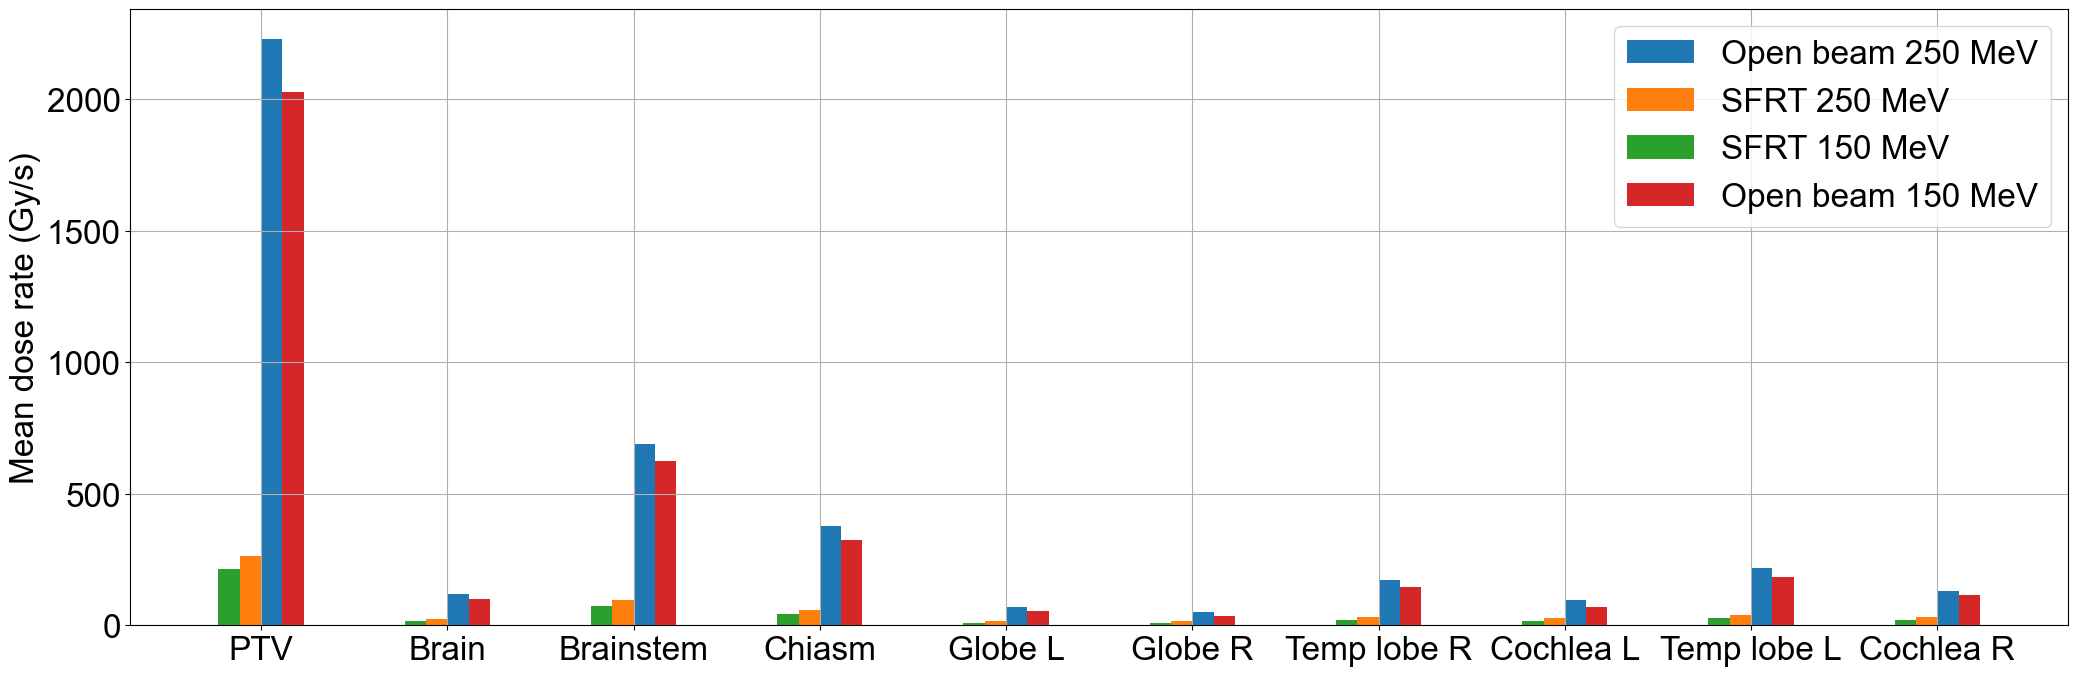

In [6]:
import csv

#Mean dose rates in PTV + OARs
struct=['PTV','Brain','Brainstem','Chiasm','Globe L','Globe R','Temp lobe R','Cochlea L','Temp lobe L', 'Cochlea R']
DRsfrt250=[263.421,24.2507,96.7405,58.6016,17.8631,16.1278,31.924,29.3084,38.9757,30.1624]
DRopen250=[2231.03,120.219,690.549,376.034,68.141,52.1093,173.199,94.9645,217.334,131.866]
DRopen150=[2026.6,98.8073,623.38,324.006,52.9015,36.3902,147.144,68.2827,183.579,113.705]
DRsfrt150=[214.455,15.2922,72.815,41.0477,10.3068,8.72495,20.9844,15.5306,25.7832,18.6286]
X_axis = np.arange(len(struct))*7

figure(1,figsize=(25,8))
plt.bar(X_axis+0.4,DRopen250,label='Open beam 250 MeV')
plt.bar(X_axis-0.4,DRsfrt250,label='SFRT 250 MeV')
plt.bar(X_axis-1.2,DRsfrt150,label='SFRT 150 MeV')
plt.bar(X_axis+1.2,DRopen150,label='Open beam 150 MeV')
plt.xticks(X_axis,struct)
plt.ylabel('Mean dose rate (Gy/s)')
plt.legend()
plt.grid()

with open('D:Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/doseratesVHEE.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(struct)
    writer.writerow(DRsfrt250)
    writer.writerow(DRopen250)
    writer.writerow(DRopen150)
    writer.writerow(DRsfrt150)